Transformer Architecture Overview:
Transformers consist of an encoder and a decoder (in models designed for tasks like translation) or just an encoder (in models like BERT used for tasks such as sentiment analysis or question answering). Each of these parts is made up of several layers that include multi-head self-attention mechanisms and feed-forward neural networks. These layers process input sequences in parallel, which is a departure from the sequential processing in traditional recurrent neural networks.
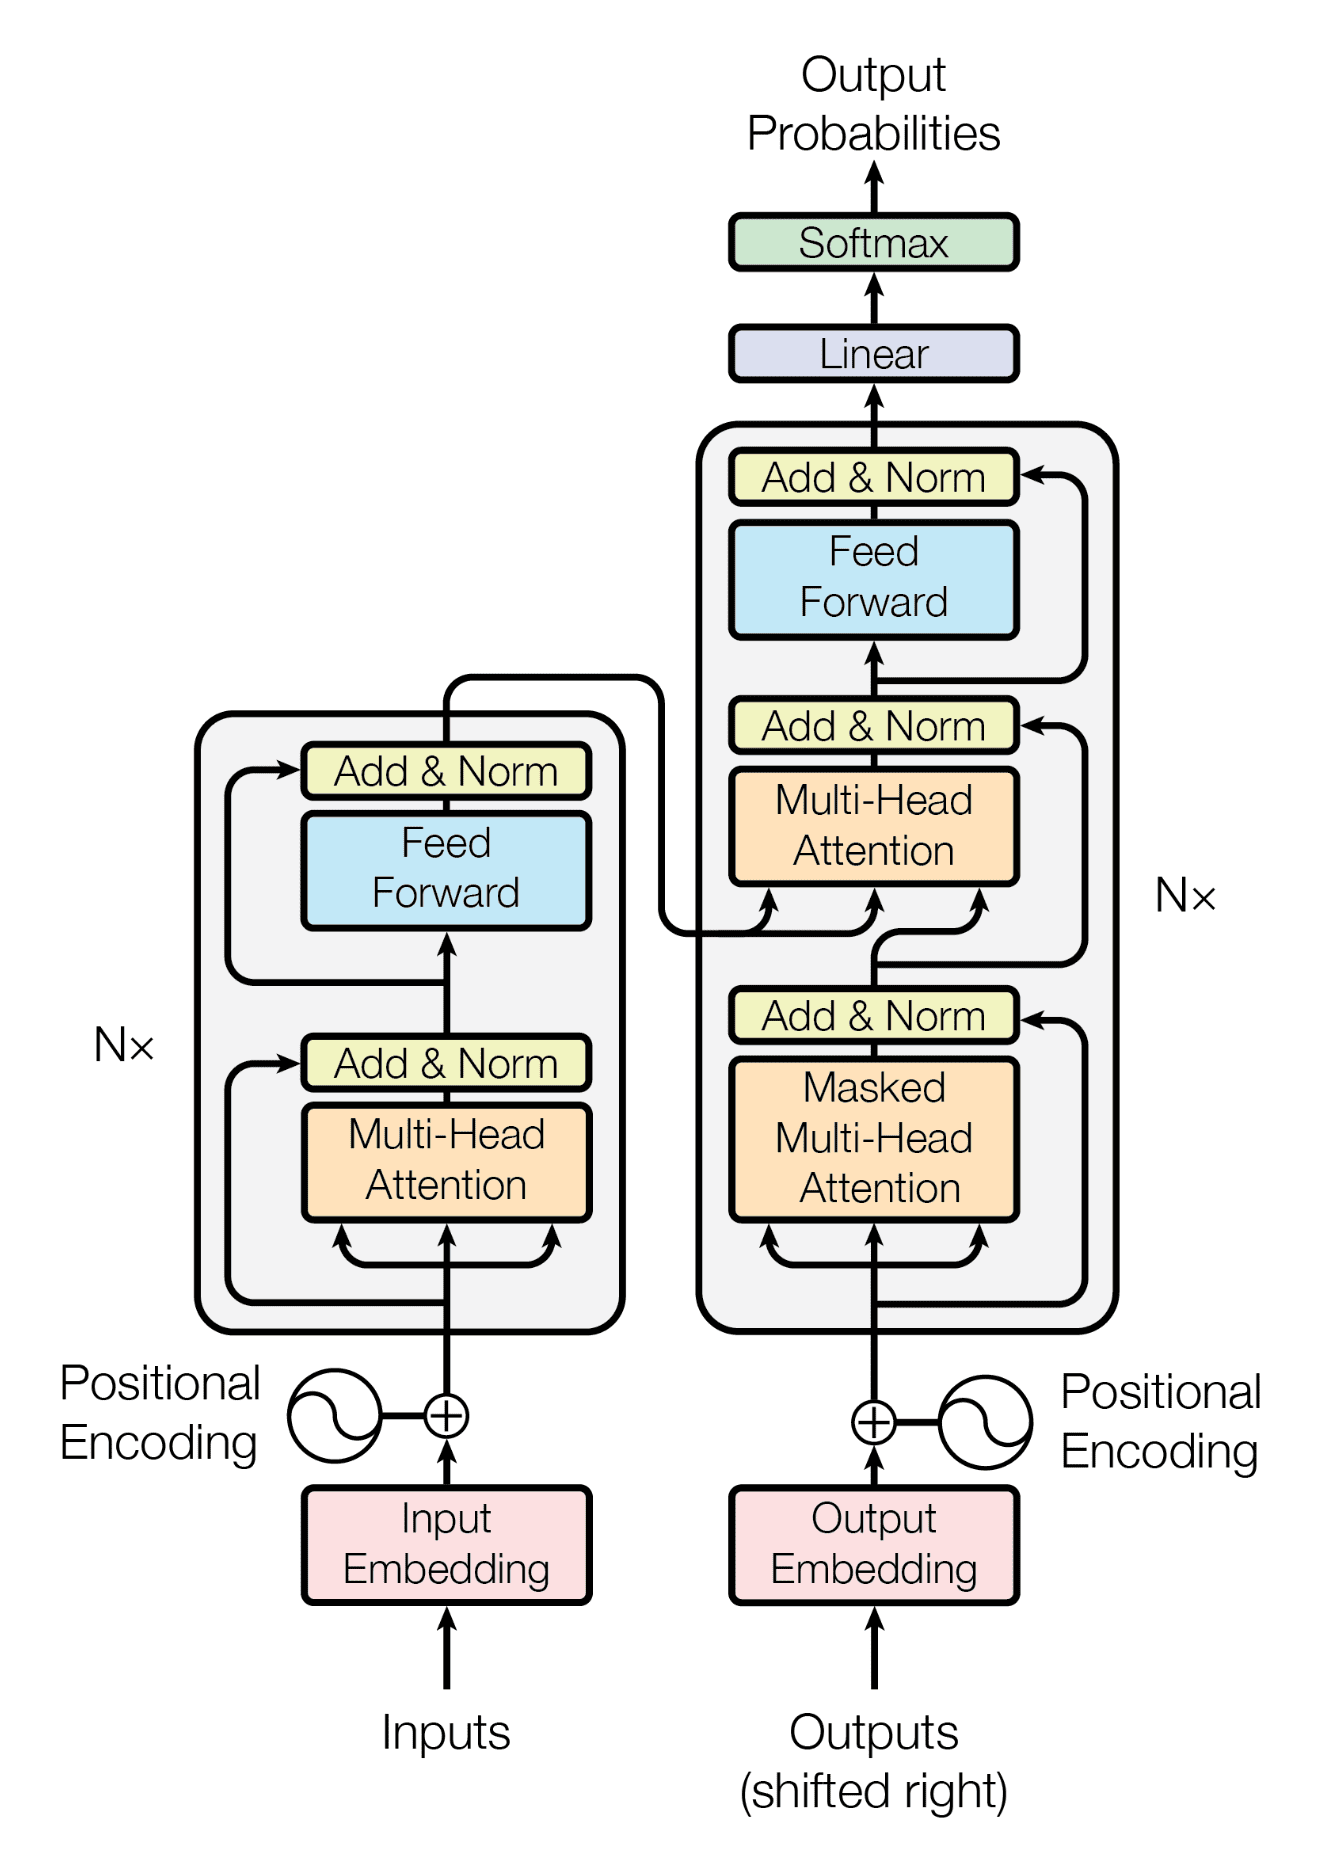

Reference: Attention Is All You Need!

**Introduction to Fine-tuning**

Fine-tuning is the process of adjusting the parameters of a pre-trained language model to better suit specific tasks.

let $ \theta $ represent the parameters of a language model initially obtained by training on a large, diverse dataset. Fine-tuning adjusts these parameters to minimize the loss $ L $ on a new, task-specific dataset $ D $:
$$ \theta^* = \arg\min_{\theta} L(D; \theta) $$

**Fine-Tuning Process**

Initialization with Pre-trained Weights:
When you fine-tune a transformer, you start with a model that has been pre-trained on a large corpus of data. This model has developed a set of weights that encode useful representations and patterns for a wide range of language tasks.

Adaptation to Specific Tasks:
During fine-tuning, you adjust these weights to make them more suitable for a specific task. This involves:

Input Processing: Transformers take input as sequences of tokens, which are converted into embeddings. These embeddings might be enhanced with positional encodings to retain information about the order of tokens.
Attention Mechanisms: The self-attention layers in the transformer allow it to weigh the importance of different words relative to each other for a given task. Fine-tuning may adjust how these attention weights are calculated and applied, emphasizing aspects crucial for the specific task.
Output Layer Adaptation: The final layers (often linear layers followed by activation functions) are specifically adapted to output results in the format required by the task, such as class labels for classification tasks or token predictions for generative tasks.
Training on Task-Specific Data:
You train the model on a dataset that is specific to your task, adjusting all or some of the model’s layers. This training updates the weights by backpropagating the loss between the model’s predictions and the true outputs.

**Types of finetuning**

Head-Level Fine-tuning: Only the parameters of the final layers (the "head") are adjusted. This is represented by:
$$[\theta_h^* = \arg\min_{\theta_h} L(D; \theta_h, \theta_{-h}) ]$$
where $(\theta_{-h})$ are the parameters that remain unchanged.

Full Model Fine-tuning: All parameters are updated, suitable for tasks significantly different from the pre-training tasks:
$$[\theta^* = \arg\min_{\theta} L(D; \theta)]$$

Layer-Specific Fine-tuning: Selective layers are fine-tuned, potentially those hypothesized to capture task-relevant features:
$$[\theta_l^* = \arg\min_{\theta_l} L(D; \theta_l, \theta_{-l}) ]$$

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from datasets import load_dataset

dataset = load_dataset("mteb/tweet_sentiment_extraction")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/27481 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3534 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 27481
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 3534
    })
})

In [ ]:
# dataset preparation
small_train_dataset = dataset["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = dataset["test"].shuffle(seed=42).select(range(1000))

In [ ]:
small_train_dataset

Dataset({
    features: ['id', 'text', 'label', 'label_text'],
    num_rows: 1000
})

In [ ]:
# Load tokenizer
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
def tokenize_function(examples):
   return tokenizer(examples["text"], padding="max_length", truncation=True)

train_tokenized_datasets = small_train_dataset.map(tokenize_function, batched=True)
test_tokenized_datasets = small_eval_dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# load pretrained model
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)
model.config.pad_token_id = tokenizer.pad_token_id

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# define model metrics
import evaluate
import numpy as np

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   return metric.compute(predictions=predictions, references=labels)

In [ ]:
# Training with trainer api
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
   output_dir="test_trainer",
   #evaluation_strategy="epoch",
   per_device_train_batch_size=4,  # Reduce batch size here
   per_device_eval_batch_size=4,    # Optionally, reduce for evaluation as well
   num_train_epochs=1,
   gradient_accumulation_steps=4
   )


trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=train_tokenized_datasets,
   eval_dataset=test_tokenized_datasets,
   compute_metrics=compute_metrics,

)

trainer.train()


Step,Training Loss


TrainOutput(global_step=62, training_loss=1.1483989838630921, metrics={'train_runtime': 239.4622, 'train_samples_per_second': 4.176, 'train_steps_per_second': 0.259, 'total_flos': 518417434017792.0, 'train_loss': 1.1483989838630921, 'epoch': 0.992})

In [ ]:
# evaluation
import evaluate

trainer.evaluate()


{'eval_loss': 0.77671217918396,
 'eval_accuracy': 0.663,
 'eval_runtime': 88.8415,
 'eval_samples_per_second': 11.256,
 'eval_steps_per_second': 2.814,
 'epoch': 1.0}

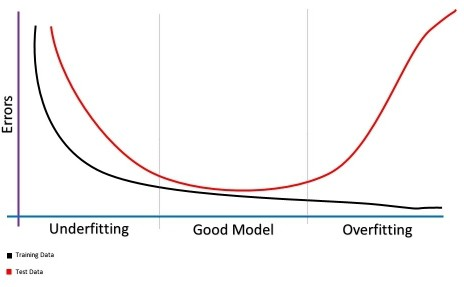

**Introducing Adapters**

![Your Image Description](https://drive.google.com/uc?export=view&id=1DK08Rh8fqolfQKy80KRFqk_ewEZgV0zH)


<table>
  <tr>
    <td><img src="https://drive.google.com/uc?export=view&id=1jhr0Crbzf6zLFPIBswDRgo2cxkB-yPH2" alt="First Image Description" style="width: 100%;"/></td>
    <td><img src="https://drive.google.com/uc?export=view&id=1yIP7RW0N14XkdfSSMc_79ANz5ZOFK4Tw" alt="Second Image Description" style="width: 100%;"/></td>
  </tr>
</table>


Regular Finetuning
$$
W^{\text{updated}} = W + \Delta W
$$

LoRA
$$
W^{\text{updated}} = W + A \cdot B
$$

![Your Image Description](https://drive.google.com/uc?export=view&id=18IHefMf211a9-DrfX51tum90FCHuVBVd)

In [ ]:
# Lora implementation

x.(W+ΔW) = x.W + x.ΔW

x.(W+A.B) = x.W + x.A.B  

In [ ]:
import torch.nn as nn

class LoRALayer(nn.Module):
    def __init__(self, in_dim, out_dim, rank, alpha):
        super().__init__()
        std_dev = 1 / torch.sqrt(torch.tensor(rank).float())
        self.A = nn.Parameter(torch.randn(in_dim, rank) * std_dev)
        self.B = nn.Parameter(torch.zeros(rank, out_dim))
        self.alpha = alpha

    def forward(self, x):
        x = self.alpha * (x @ self.A @ self.B)
        return x

In [ ]:
class LinearWithLoRA(nn.Module):

    def __init__(self, linear, rank, alpha):
        super().__init__()
        self.linear = linear
        self.lora = LoRALayer(
            linear.in_features, linear.out_features, rank, alpha
        )

    def forward(self, x):
        return self.linear(x) + self.lora(x)

In [ ]:
import torch
import torch.nn.functional as F

torch.manual_seed(123)
layer = nn.Linear(10, 2)
x = torch.randn((1, 10))

print("Original output:", layer(x))

Original output: tensor([[0.6639, 0.4487]], grad_fn=<AddmmBackward0>)


In [ ]:
layer_lora_1 = LinearWithLoRA(layer, rank=2, alpha=4)
print("LoRA output:", layer_lora_1(x))

LoRA output: tensor([[0.6639, 0.4487]], grad_fn=<AddBackward0>)


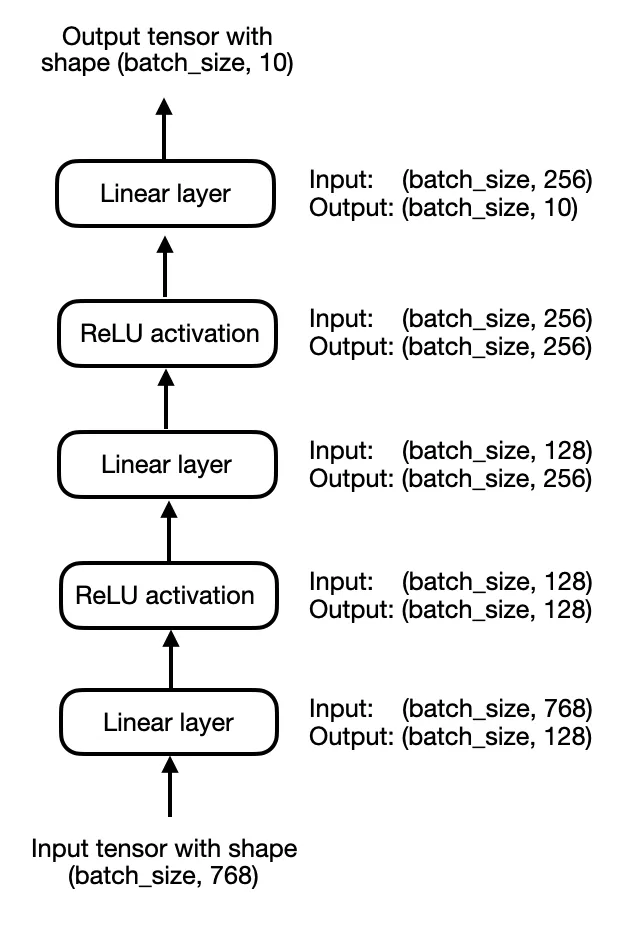

In [ ]:

class MultilayerPerceptron(nn.Module):
    def __init__(self, num_features,
        num_hidden_1, num_hidden_2, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(num_features, num_hidden_1),
            nn.ReLU(),
            nn.Linear(num_hidden_1, num_hidden_2),
            nn.ReLU(),

            nn.Linear(num_hidden_2, num_classes)
        )

    def forward(self, x):
        x = self.layers(x)
        return x


model = MultilayerPerceptron(
    num_features=784,
    num_hidden_1=128,
    num_hidden_2=256,
    num_classes=10
)

print(model)

MultilayerPerceptron(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [ ]:
model.layers[0] = LinearWithLoRA(model.layers[0], rank=4, alpha=8)
model.layers[2] = LinearWithLoRA(model.layers[2], rank=4, alpha=8)
model.layers[4] = LinearWithLoRA(model.layers[4], rank=4, alpha=8)

print(model)


MultilayerPerceptron(
  (layers): Sequential(
    (0): LinearWithLoRA(
      (linear): Linear(in_features=784, out_features=128, bias=True)
      (lora): LoRALayer()
    )
    (1): ReLU()
    (2): LinearWithLoRA(
      (linear): Linear(in_features=128, out_features=256, bias=True)
      (lora): LoRALayer()
    )
    (3): ReLU()
    (4): LinearWithLoRA(
      (linear): Linear(in_features=256, out_features=10, bias=True)
      (lora): LoRALayer()
    )
  )
)


In [ ]:
def freeze_linear_layers(model):
    for child in model.children():
        if isinstance(child, nn.Linear):
            for param in child.parameters():
                param.requires_grad = False
        else:
            # Recursively freeze linear layers in children modules
            freeze_linear_layers(child)

freeze_linear_layers(model)
for name, param in model.named_parameters():
    print(f"{name}: {param.requires_grad}")

layers.0.linear.weight: False
layers.0.linear.bias: False
layers.0.lora.A: True
layers.0.lora.B: True
layers.2.linear.weight: False
layers.2.linear.bias: False
layers.2.lora.A: True
layers.2.lora.B: True
layers.4.linear.weight: False
layers.4.linear.bias: False
layers.4.lora.A: True
layers.4.lora.B: True


## Practice exercise:
Modify DistilBert by adding lora layers

https://lightning.ai/lightning-ai/studios/code-lora-from-scratch?tab=files&layout=column&path=cloudspaces%2F01hm9hypqc6y1hrapb5prmtz0h&y=4&x=0

# References:
https://www.datacamp.com/tutorial/fine-tuning-large-language-models

https://arxiv.org/pdf/2312.12148

https://arxiv.org/pdf/2403.14608

https://www.datacamp.com/tutorial/fine-tuning-llama-2

https://magazine.sebastianraschka.com/p/lora-and-dora-from-scratch
